# Quiz 8: Applying PageRank with taxation

## Import Libraries

In [1]:
import numpy as np
from PageRankv1 import PageRank

In [2]:
np.set_printoptions(precision=4, suppress=True)

## Extend PageRank v1

In [3]:
class PageRank_v2(PageRank):
    """
    Extend the PageRank class to calculate the page rank until the page distribution converges. Also add the taxation.
    """
    def get_pagerank(self):
        """
        Calculates the PageRank.

        Returns:
            A list with the PageRank values calculated from the input graph.
        """
        step = 1
        converged = False
        rankings = self.get_initial_vector()

        while not(converged):
            # get the new rankings
            new_rankings = self.get_distribution(step)

            # determine if the rankings have stabalized
            #print(new_rankings)
            converged = np.sum(np.absolute(rankings -  new_rankings)) < 1e-5
            rankings = new_rankings

            step = step + 1
            if step == 500:
                print('*** COULD NOT CONVERGE! ***')
                converged = True

        return rankings
    
    def get_distribution(self, n, beta=None):
        """
        Get the distribution after n steps.

        Args:
            n: The number of steps to perform.
            beta: tge beta value to use to deal with spider traps.
        """
        M = self.get_transitionmatrix()
        v = self.get_initial_vector()

        for i in range(n):
            if beta == None:
                v = np.matmul(M, v)
            else:
                v = beta * np.matmul(M, v) + ((1-beta) / len(v)) * np.ones(len(v))

        return v    

# test calculations with taxation
grap_edges = [
    ['A', 'B'],
    ['A', 'C'],
    ['A', 'D'],
    ['B', 'A'],
    ['C', 'D'],
    ['D', 'D']
]

pageRank = PageRank_v2(grap_edges)
print('Transition Matrix:\n', pageRank.get_transitionmatrix(), '\n')
print('Initial Vector:', pageRank.get_initial_vector(), '\n')

print('After Step 1:', pageRank.get_distribution(n=1, beta=0.8))
print('After Step 2:', pageRank.get_distribution(n=2, beta=0.8))

Transition Matrix:
 [[0.     1.     0.     0.    ]
 [0.3333 0.     0.     0.    ]
 [0.3333 0.     0.     0.    ]
 [0.3333 0.     1.     1.    ]] 

Initial Vector: [0.25 0.25 0.25 0.25] 

After Step 1: [0.25   0.1167 0.1167 0.5167]
After Step 2: [0.1433 0.1167 0.1167 0.6233]


## Question 3

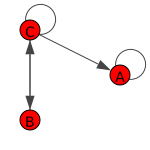

In [4]:
# initialize the graph
grap_edges = [
    ['A', 'A'],
    ['B', 'C'],
    ['C', 'C'],
    ['C', 'A'],
    ['C', 'B']
]

pageRank = PageRank_v2(grap_edges)
pageRank.plotGraph(width=150, height=150, layout='circle', margin=30, edge_curved=False)

In [5]:
# get the page rank
print('Calculated PageRank :', pageRank.get_pagerank())
print('iGraph PageRank     :', pageRank.graph.pagerank())

Calculated PageRank : [1. 0. 0.]
iGraph PageRank     : [0.7005253940455342, 0.10507880910683014, 0.19439579684763578]


## Question 4

Compute the transition matrix after two steps in the graph with beta = 0.8

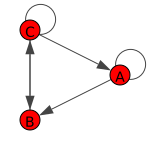

In [6]:
# initialize the graph
grap_edges = [
    ['A', 'A'],
    ['A', 'B'],
    ['B', 'C'],
    ['C', 'C'],
    ['C', 'A'],
    ['C', 'B'],

]

pageRank = PageRank_v2(grap_edges)
pageRank.plotGraph(width=150, height=150, layout='circle', margin=30, edge_curved=False)

In [8]:
#print('NO Taxation  :', pageRank.get_distribution(2))
print('With Taxation:', pageRank.get_distribution(2, beta=0.8))

With Taxation: [0.2948 0.2948 0.4104]
